In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
file_path = '../cleaner/cleaned_ads_dimension.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
data.head()

,ad_id,delivery_country,punish_num,avg_ad_revenue,baseline_st
0,1747578422390810,US,1,4795.250,1.78
1,1758543228094480,SA,1,1063.767,1.67
2,1738303151826990,AU,2,5.365,1.84
3,1738303920938010,NZ,2,5.365,1.58
4,1738304016410620,NZ,2,5.365,1.58


In [19]:
# Convert to max-max problem
data["punish_num"] *= -1

# Step 1: Identifying the Nadir and Utopia points
utopia_point = [data['avg_ad_revenue'].max(), data['punish_num'].max()]
nadir_point = [data['avg_ad_revenue'].min(), data['punish_num'].min()]

# Step 2: Normalizing the objective values
data['normalized_avg_ad_revenue'] = (data['avg_ad_revenue'] - utopia_point[0]) / (nadir_point[0] - utopia_point[0])
data['normalized_punish_num'] = (data['punish_num'] - utopia_point[1]) / (nadir_point[1] - utopia_point[1])

# Step 3: Recalculating the distance to Utopia point using the normalized values
data['normalized_distance_to_utopia'] = ((data['normalized_avg_ad_revenue'] - 0)**2 + (data['normalized_punish_num'] - 0)**2)**0.5

# Displaying the first few rows of the dataset with the new normalized columns
data.head()


,ad_id,delivery_country,punish_num,avg_ad_revenue,baseline_st,normalized_avg_ad_revenue,normalized_punish_num,normalized_distance_to_utopia
0,1747578422390810,US,-1,4795.250,1.78,0.720304,0.0625,0.723010
1,1758543228094480,SA,-1,1063.767,1.67,0.937953,0.0625,0.940033
2,1738303151826990,AU,-2,5.365,1.84,0.999687,0.1250,1.007472
3,1738303920938010,NZ,-2,5.365,1.58,0.999687,0.1250,1.007472
4,1738304016410620,NZ,-2,5.365,1.58,0.999687,0.1250,1.007472


In [20]:
# Step 5: Ranking the Records Based on Priority
data['priority_rank'] = data.groupby('delivery_country')['normalized_distance_to_utopia'].rank(method='first')

# Step 6: Generating the Queues
queues = data.sort_values(by=['delivery_country', 'priority_rank']).groupby('delivery_country')['ad_id'].apply(list)

# Displaying the first few queues
queues.head()


delivery_country
AE    [1772824938410000, 1771639952060430, 177175490...
AR    [1767234953622530, 1769982368863240, 177231827...
AT    [1773293685750830, 1773293685750830, 177320547...
AU    [1773563867768910, 1765107022556160, 176510702...
BE    [1773205472709660, 1758841989024770, 177356037...
Name: ad_id, dtype: object

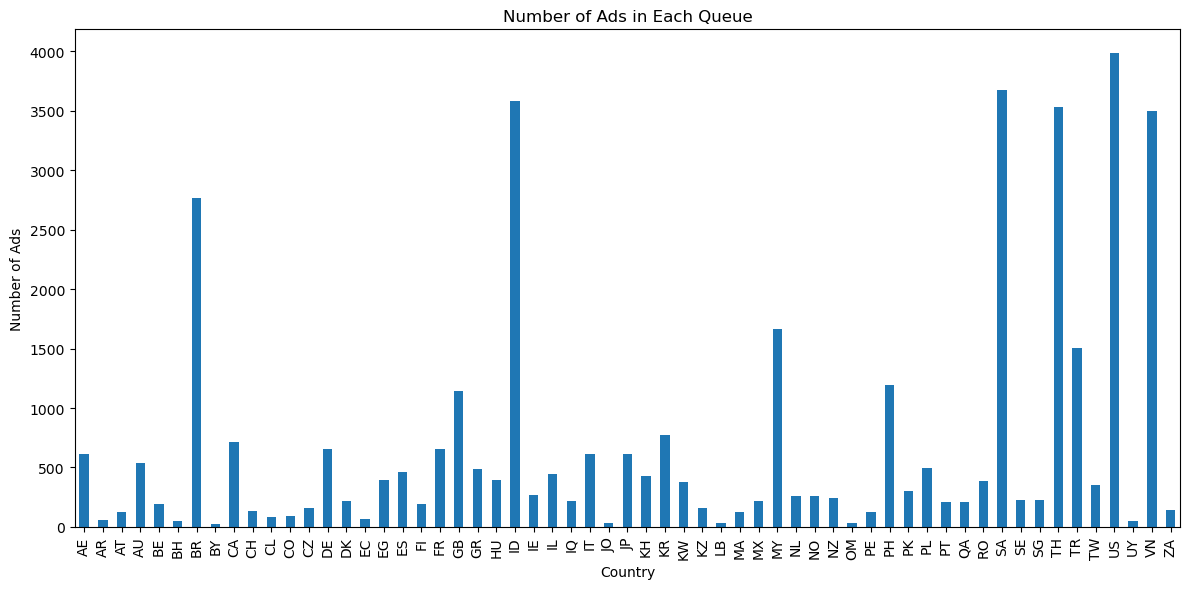

In [21]:
# Counting the number of ads in each queue
queue_lengths = queues.apply(len)

# Creating a bar plot to visualize the number of ads in each queue
plt.figure(figsize=(12, 6))
queue_lengths.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Ads')
plt.title('Number of Ads in Each Queue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
